In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Database connection parameters
user = 'root'
password = 'ilija'
host = 'localhost'
database = 'dbl_database'
# Create the connection string
connection_string = f"mysql+pymysql://{user}:{password}@{host}/{database}"
# Create the SQLAlchemy engine
engine = create_engine(connection_string)


In [ ]:
# Define the query
#Frequency couint query for labels on all tweets
query = """
SELECT tweets.text, tweets.label
FROM tweets
WHERE tweets.label = 'positive' OR label = 'neutral' OR label = 'negative';
"""

# Load the result of the query into a DataFrame
df_total_label = pd.read_sql(query, engine)

# Display the DataFrame
label_counts = df_total_label['label'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Counts of Positive, Negative, and Neutral Labels on all tweets')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

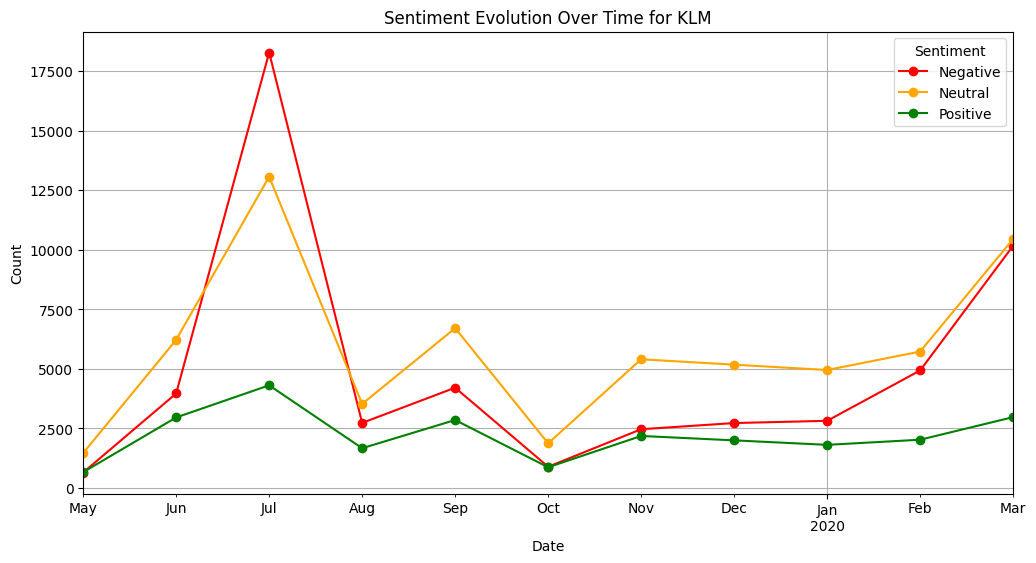

In [16]:
#Sentiment change through months for KLM

klm_query = r"""
SELECT 
    text, 
    label,
    FROM_UNIXTIME(timestamp_ms / 1000) AS datetime
FROM tweets
WHERE mentioned_airlines LIKE '%%KLM%%' OR user_mentions LIKE '%%56377143%%';
"""

# Load the result of the query into a DataFrame
klm_df = pd.read_sql(klm_query, engine)

# Convert the datetime column to pandas datetime
klm_df['datetime'] = pd.to_datetime(klm_df['datetime'])

# Extract year and month
klm_df['year_month'] = klm_df['datetime'].dt.to_period('M')

# Count occurrences of each label per month
label_counts = klm_df.groupby(['year_month', 'label']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
label_counts.plot(kind='line', marker='o', ax=plt.gca(), color=['red', 'orange', 'green'])
plt.title('Sentiment Evolution Over Time for KLM')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.grid(True)
plt.show()

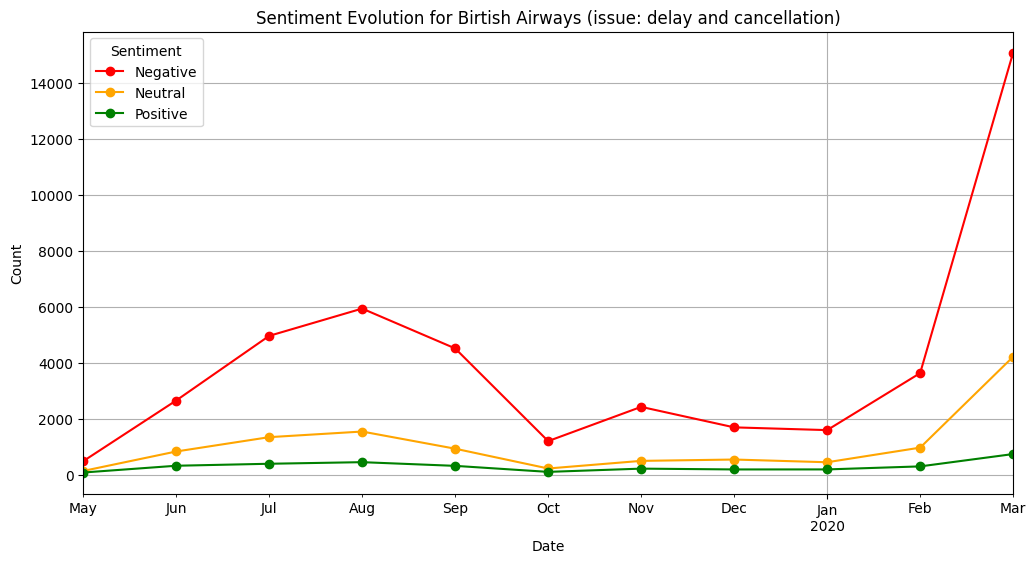

In [19]:

#Sentiment change through months for Birtish Airwayas

brit_query = r"""
SELECT 
    text, 
    label,
    FROM_UNIXTIME(timestamp_ms / 1000) AS datetime
FROM tweets
WHERE (mentioned_airlines LIKE '%%British_Airways%%' OR user_mentions LIKE '%%18332190%%') AND tweets.delay_and_cancellation = 1;
"""

# Load the result of the query into a DataFrame
brit_df = pd.read_sql(brit_query, engine)

# Convert the datetime column to pandas datetime
brit_df['datetime'] = pd.to_datetime(brit_df['datetime'])

# Extract year and month
brit_df['year_month'] = brit_df['datetime'].dt.to_period('M')

# Count occurrences of each label per month
sent_change_brit = brit_df.groupby(['year_month', 'label']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sent_change_brit.plot(kind='line', marker='o', ax=plt.gca(), color=['red', 'orange', 'green'])
plt.title('Sentiment Evolution for Birtish Airways (issue: delay and cancellation)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.grid(True)
plt.show()

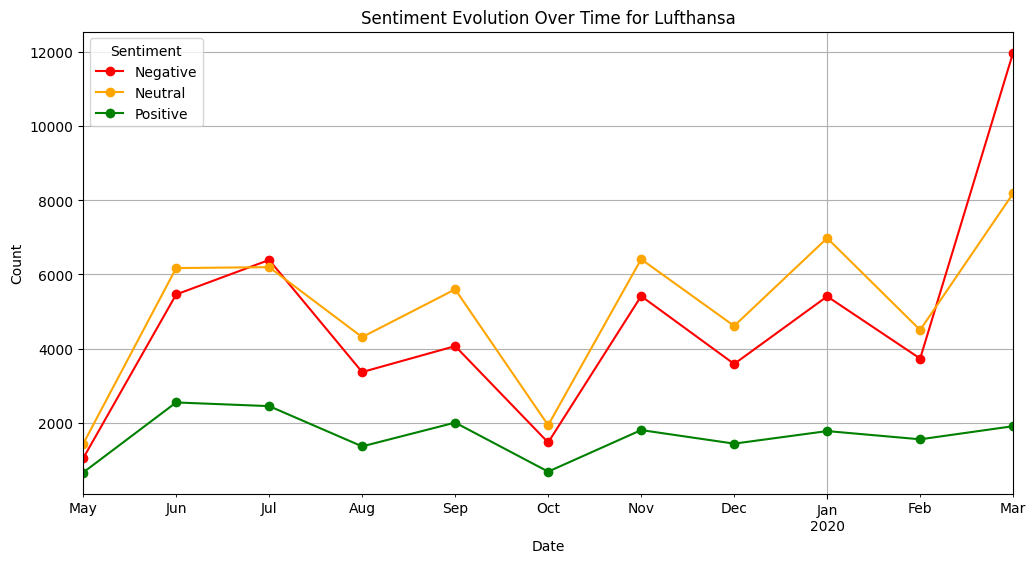

In [18]:
#Sentiment change through months for Lufthansa

luft_query = r"""
SELECT 
    text, 
    label,
    FROM_UNIXTIME(timestamp_ms / 1000) AS datetime
FROM tweets
WHERE mentioned_airlines LIKE '%%Lufthansa%%' OR user_mentions LIKE '%%124476322%%';
"""

# Load the result of the query into a DataFrame
luft_df = pd.read_sql(luft_query, engine)

# Convert the datetime column to pandas datetime
luft_df['datetime'] = pd.to_datetime(luft_df['datetime'])

# Extract year and month
luft_df['year_month'] = luft_df['datetime'].dt.to_period('M')

# Count occurrences of each label per month
sent_change_luft = luft_df.groupby(['year_month', 'label']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sent_change_luft.plot(kind='line', marker='o', ax=plt.gca(), color=['red', 'orange', 'green'])
plt.title('Sentiment Evolution Over Time for Lufthansa')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.grid(True)
plt.show()

In [ ]:
#Sentiment change through months for Air France

airf_query = r"""
SELECT 
    text, 
    label,
    FROM_UNIXTIME(timestamp_ms / 1000) AS datetime
FROM tweets
WHERE mentioned_airlines LIKE '%%AirFrance%%' OR user_mentions LIKE '%%106062176%%';
"""

# Load the result of the query into a DataFrame
airf_df = pd.read_sql(airf_query, engine)

# Convert the datetime column to pandas datetime
airf_df['datetime'] = pd.to_datetime(airf_df['datetime'])

# Extract year and month
airf_df['year_month'] = airf_df['datetime'].dt.to_period('M')

# Count occurrences of each label per month
sent_change_airf = airf_df.groupby(['year_month', 'label']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sent_change_airf.plot(kind='line', marker='o', ax=plt.gca(), color=['red', 'orange', 'green'])
plt.title('Sentiment Evolution Over Time for Air France')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.grid(True)
plt.show()

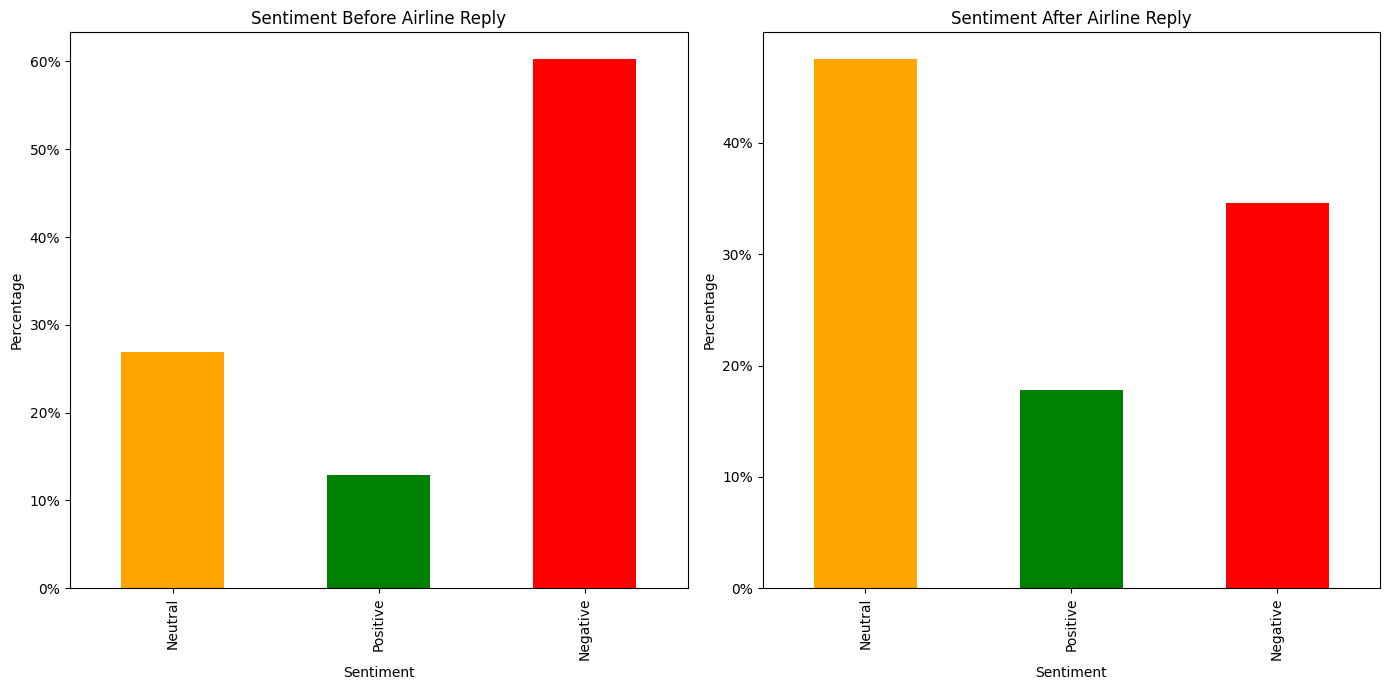

In [50]:

from matplotlib.ticker import FuncFormatter

airline_user_id = 18332190  # Replace with actual user ID for the airline


# Define the query to get all tweets in the conversations involving British Airways
query = """
SELECT tweets.text,
       tweets.label, 
       tweets.user_id,
       FROM_UNIXTIME(tweets.timestamp_ms / 1000) AS datetime,
       hasher.conversation_id
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%%British_Airways%%'
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways = pd.read_sql(query, engine)

# Convert the datetime column to pandas datetime
df_tweets_british_airways['datetime'] = pd.to_datetime(df_tweets_british_airways['datetime'])

# Initialize empty lists to store sentiments
sentiments_before_reply = []
sentiments_after_reply = []

# Group tweets by conversation_id
grouped = df_tweets_british_airways.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped:
    # Identify the timestamp of the airline's reply
    airline_reply = group[group['user_id'] == airline_user_id]
    if not airline_reply.empty:
        airline_reply_time = airline_reply['datetime'].iloc[0]

        # Tweets before the airline reply
        tweets_before_reply = group[group['datetime'] < airline_reply_time]
        sentiments_before_reply.extend(tweets_before_reply['label'].tolist())
        
        # Tweets after the airline reply
        tweets_after_reply = group[group['datetime'] >= airline_reply_time]
        sentiments_after_reply.extend(tweets_after_reply['label'].tolist())

# Convert to DataFrame for plotting
df_before_reply = pd.DataFrame(sentiments_before_reply, columns=['label'])
df_after_reply = pd.DataFrame(sentiments_after_reply, columns=['label'])

# Calculate percentages
before_counts = df_before_reply['label'].value_counts(normalize=True) * 100
after_counts = df_after_reply['label'].value_counts(normalize=True) * 100

# Plot sentiment before and after the reply
plt.figure(figsize=(14, 7))

# Sentiment before reply
plt.subplot(1, 2, 1)
before_counts.reindex(['neutral', 'positive', 'negative'], fill_value=0).plot(kind='bar', color=['orange', 'green', 'red'])
plt.title('Sentiment Before Airline Reply')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Neutral', 'Positive', 'Negative'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Sentiment after reply
plt.subplot(1, 2, 2)
after_counts.reindex(['neutral', 'positive', 'negative'], fill_value=0).plot(kind='bar', color=['orange', 'green', 'red'])
plt.title('Sentiment After Airline Reply')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2], ['Neutral', 'Positive', 'Negative'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.tight_layout()
plt.show()


Airline reply time: 2019-07-31 03:51:37.459000
Tweets before reply:
                                                 text     label   user_id  \
0   @flyswiss i also booked a flight from london t...   neutral  15867828   
1   @flyswiss @british_airways i booked both fligh...   neutral  15867828   
2   @flyswiss @british_airways on the afternoon of...  negative  15867828   
3   @flyswiss @british_airways that way the change...   neutral  15867828   
4   @flyswiss @british_airways unfortunately that ...  negative  15867828   
5   @flyswiss @british_airways swiss had completel...  negative  15867828   
6   @flyswiss @british_airways a flight at 1:10 pm...  negative  15867828   
7   @flyswiss @british_airways so after a few call...   neutral  15867828   
8   @flyswiss @british_airways then i booked a sep...   neutral  15867828   
9   @flyswiss @british_airways unfortunately when ...  negative  15867828   
10  @flyswiss @british_airways because ba had canc...  negative  15867828   
11  @fly

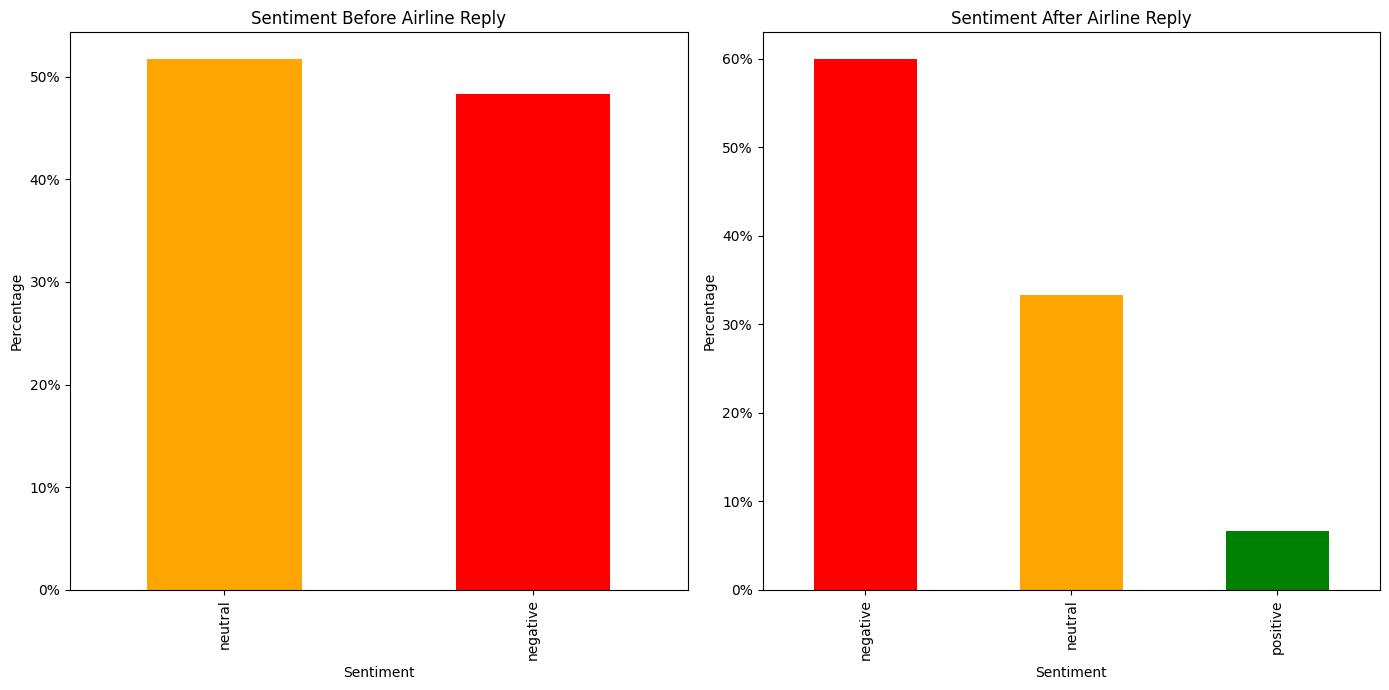

In [48]:
from matplotlib.ticker import FuncFormatter
query = """
SELECT tweets.text,
       tweets.label, 
       tweets.user_id,
       FROM_UNIXTIME(tweets.timestamp_ms / 1000) AS datetime
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.conversation_id = (
    SELECT conversation_id
    FROM conversations
    WHERE airline LIKE '%%British_Airways%%'
    ORDER BY length DESC
    LIMIT 1
)
ORDER BY tweets.timestamp_ms;
"""
airline_user_id = 18332190
# Load the result of the query into a DataFrame
df_tweets_in_max_conversation = pd.read_sql(query, engine)

# Load the result of the query into a DataFrame
df_tweets_in_max_conversation = pd.read_sql(query, engine)

# Convert the datetime column to pandas datetime
df_tweets_in_max_conversation['datetime'] = pd.to_datetime(df_tweets_in_max_conversation['datetime'])

# Identify the timestamp of the airline's reply
airline_reply = df_tweets_in_max_conversation[df_tweets_in_max_conversation['user_id'] == airline_user_id]
if not airline_reply.empty:
    airline_reply_time = airline_reply['datetime'].iloc[0]
else:
    airline_reply_time = None

print(f"Airline reply time: {airline_reply_time}")

if airline_reply_time is not None:
    # Tweets before the airline reply
    tweets_before_reply = df_tweets_in_max_conversation[df_tweets_in_max_conversation['datetime'] < airline_reply_time]
    
    # Tweets after the airline reply
    tweets_after_reply = df_tweets_in_max_conversation[df_tweets_in_max_conversation['datetime'] >= airline_reply_time]
    
    # Display DataFrames for verification
    print("Tweets before reply:")
    print(tweets_before_reply)
    
    print("Tweets after reply:")
    print(tweets_after_reply)
else:
    print("No airline reply found in the conversation.")

if airline_reply_time is not None:
    # Calculate sentiment percentages
    before_counts = tweets_before_reply['label'].value_counts(normalize=True) * 100
    after_counts = tweets_after_reply['label'].value_counts(normalize=True) * 100
    
    # Plot sentiment before and after the reply
    plt.figure(figsize=(14, 7))
    
    # Sentiment before reply
    plt.subplot(1, 2, 1)
    before_counts.plot(kind='bar', color=['orange', 'red', 'green'])
    plt.title('Sentiment Before Airline Reply')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
    
    # Sentiment after reply
    plt.subplot(1, 2, 2)
    after_counts.plot(kind='bar', color=['red', 'orange', 'green'])
    plt.title('Sentiment After Airline Reply')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
    
    plt.tight_layout()
    plt.show()
else:
    print("No airline reply found, unable to plot sentiment comparison.")